In [1]:
import os, sys, re, collections, string
from operator import itemgetter as at
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
sys.path.append("../python")
import data
%matplotlib inline

Read the data
---

In [2]:
df = data.asDataFrame()
df

,file,tag
num,,
19231,rsu-19231.txt,rsu
43301,bylaws-43301.txt,bylaws
21976,rsu-21976.txt,rsu
41516,bylaws-41516.txt,bylaws
4908,employment-04908.txt,employment
35903,rsu-35903.txt,rsu
39272,rra-39272.txt,rra
40608,bylaws-40608.txt,bylaws
15805,employment-15805.txt,employment


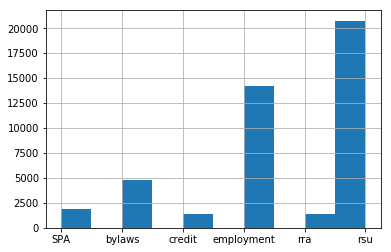

In [3]:
df.tag.hist()

In [4]:
print(data.readFile("employment-10964.txt"))

* * *

Exhibit 10.1 



This EMPLOYMENT AGREEMENT (the “Agreement”), is dated as of January 7, 2013 by and between China BAK Battery, Inc., a corporation incorporated under the laws of the State of Nevada, U.S. (the “Company”) and Danny Pan (the “Employee”). 

RECITALS 

A. The Company has appointed the Employee as its Chief Financial Officer and the Employee has accepted such appointment for the term of Employment (as defined below). 

B. In connection with such appointment, the Company and the Employee desire to enter into this Agreement setting forth the terms and conditions of the Employment. 

AGREEMENT 

The parties hereto agree as follows:  
  
1\. 

POSITION  
  
The Employee hereby accepts a position of Chief Financial Officer (the “Employment”) of the Company.  
  
2\. 

TERM  
  
Subject to the terms and conditions of this Agreement, the initial term of the Employment shall commence on January 7, 2013 (the “Effective Date”), until January 7, 2015, unless terminated sooner pu

In [5]:
i = 0
for tag, body in data.getIterator():
    print ("="* 100)
    print (tag)
    print ("-"* 100)
    print (body[:1000])
    i+=1
    if i>=3:
        break

rsu
----------------------------------------------------------------------------------------------------
* * *

  


EXHIBIT 10.21

  


ALPHA NATURAL RESOURCES, INC.

2005 LONG-TERM INCENTIVE PLAN

  




(FOR EMPLOYEES)

  


This Performance Share Award Agreement set forth below (this "Agreement") is dated as of the grant date (the "Grant Date") set forth on the applicable Summary of Performance Share Grant and is between Alpha Natural Resources, Inc., a Delaware corporation ("Alpha"), and the individual named on the Summary of Performance Share Grant (the "Award Recipient"). The Award Recipient may view or obtain a copy of the Award Recipient's Summary of Performance Share Grant document by accessing Smith Barney Benefit Access at www.benefitaccess.com.

  


Alpha has established its 2005 Long-Term Incentive Plan (the "Plan") to advance the interests of Alpha and its stockholders by providing incentives to certain eligible persons who contribute significantly to the strategic and 

Preprocess
---

In [6]:
sample_doc = data.readFile("SPA-00155.txt")
print (sample_doc)

Exhibit 10.7

  




This Stock Purchase Agreement (this “Agreement”) is made as of April 10, 2015 by and between the persons set forth on Exhibit A attached hereto (each an “Investor” and collectively, the “Investors”) and Brazil Minerals, Inc., a Nevada corporation (the “Company”).

WHEREAS, upon the terms and conditions set forth in this Agreement, the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company (the “Common Stock”) set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investor’s name on Exhibit A hereto.

NOW, THEREFORE, in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration, the receipt and adequacy of which are hereby acknowledged, the parties hereto agree as follows:

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement, each Investor agrees to purcha

### Replacing uninformative tokens
In this example we replace all numeric tokens with a `<NUM>` token

In [7]:
digits = re.compile(r"\d[\d\.\$]*")
sample_doc = digits.sub("<NUM>", sample_doc)
print (sample_doc)

Exhibit <NUM>

  




This Stock Purchase Agreement (this “Agreement”) is made as of April <NUM>, <NUM> by and between the persons set forth on Exhibit A attached hereto (each an “Investor” and collectively, the “Investors”) and Brazil Minerals, Inc., a Nevada corporation (the “Company”).

WHEREAS, upon the terms and conditions set forth in this Agreement, the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company (the “Common Stock”) set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investor’s name on Exhibit A hereto.

NOW, THEREFORE, in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration, the receipt and adequacy of which are hereby acknowledged, the parties hereto agree as follows:

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement, each Investor agrees to p

### Remove punctuation and unknown charactars

In [8]:
not_allowed = re.compile(r"[^\s\w<>_]")
sample_doc = not_allowed.sub("", sample_doc)
print (sample_doc)

Exhibit <NUM>

  




This Stock Purchase Agreement this Agreement is made as of April <NUM> <NUM> by and between the persons set forth on Exhibit A attached hereto each an Investor and collectively the Investors and Brazil Minerals Inc a Nevada corporation the Company

WHEREAS upon the terms and conditions set forth in this Agreement the Company proposes to issue and sell to each Investor the aggregate number of shares of common stock of the Company the Common Stock set forth opposite the name of such Investor on Exhibit A hereto for the aggregate purchase price set forth opposite the Investors name on Exhibit A hereto

NOW THEREFORE in consideration of the mutual covenants and agreements set forth herein and for good and valuable consideration the receipt and adequacy of which are hereby acknowledged the parties hereto agree as follows

ARTICLE I   
  
SALE OF SECURITIES

Subject to the terms and conditions of this Agreement each Investor agrees to purchase and the Company agrees to 

### Putting it all together

In [9]:
def clean_text(text):
    return not_allowed.sub("", digits.sub("<NUM>",text.lower()))

Bag of words vecorization
---

In [10]:
def bag_of_words(text):
    return collections.Counter(text.split())

In [11]:
bag_of_words("My dog is bigger than your dog")

Counter({'My': 1, 'bigger': 1, 'dog': 2, 'is': 1, 'than': 1, 'your': 1})

In [12]:
vocabulary = ["dog", "cat", "bigger"]
def BOW_vector(text):
    return at(*vocabulary)(bag_of_words(text))

In [13]:
BOW_vector("My dog is bigger than your dog")

(2, 0, 1)

## Preparing for modelling

In [14]:
vocabulary = ["share", "stock", "loan", "obligation", "agreement", "employee"]
df = data.asDataFrame(vectorizer=BOW_vector)
df

,vector,tag
num,,
19231,"(1, 4, 0, 1, 7, 1)",rsu
43301,"(0, 0, 0, 0, 0, 8)",bylaws
21976,"(0, 13, 0, 1, 4, 1)",rsu
41516,"(0, 0, 0, 0, 0, 0)",bylaws
4908,"(0, 4, 0, 1, 3, 1)",employment
35903,"(0, 12, 0, 0, 1, 1)",rsu
39272,"(1, 8, 0, 1, 1, 0)",rra
40608,"(1, 16, 1, 0, 0, 0)",bylaws
15805,"(0, 3, 0, 2, 7, 8)",employment


In [15]:
X = df.vector
y = df.tag